In [1]:
# import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# load data
data_1 = pd.read_excel('data/Paper1_figure_3G.xls', skiprows=2, sheet_name='Sheet1')
data_2 = pd.read_excel('data/Paper1_figure_3G.xls', skiprows=2, sheet_name='Sheet2')
data_3 = pd.read_excel('data/Paper1_figure_3G.xls', skiprows=2, sheet_name='Sheet3')
data_4 = pd.read_excel('data/Paper1_figure_3G.xls', skiprows=2, sheet_name='Sheet4')

# print data
# print(data_1)
# print(data_2)
# print(data_3)
# print(data_4)


In [60]:
def plot_1(data, fig, axes):
    for i in range(3):
        axes.scatter(1*np.ones(len(data['IgG2b'])), 
                data['IgG2b'], 
                color='#000000')
        axes.scatter(2*np.ones(len(data['anti-CD4'])), 
                data['anti-CD4'], 
                color='#2c51b0')
        axes.scatter(3*np.ones(len(data['anti-CD8'])), 
                data['anti-CD8'], 
                color='#eb4034')

    # the error bars
    axes.bar(1,
            height=np.mean(data['IgG2b']),
            yerr=np.std(data['IgG2b']),    # error bars
            capsize=15, # error bar cap width in points
            color=(0, 0, 0, 0),  # face color transparent
            edgecolor=(0, 0, 0, 0),
            )

    axes.bar(2,
        height=np.mean(data['anti-CD4']),
        yerr=np.std(data['anti-CD4']),    # error bars
        capsize=15, # error bar cap width in points
        color=(0, 0, 0, 0),  # face color transparent
        edgecolor=(0, 0, 0, 0),
        )      

    axes.bar(3,
            height=np.mean(data['anti-CD8']),
            yerr=np.std(data['anti-CD8']),    # error bars
            capsize=15, # error bar cap width in points
            color=(0, 0, 0, 0),  # face color transparent
            edgecolor=(0, 0, 0, 0),
            )    

    # more parameters
    axes.set_xlim([0.5, 3.5])
    axes.set_xticks([1, 2, 3], ['IgG2b', 'anti-CD4', 'anti-CD8'])
    fig.set_size_inches([13, 3])
    

Text(0.5, 1.0, 'CD206')

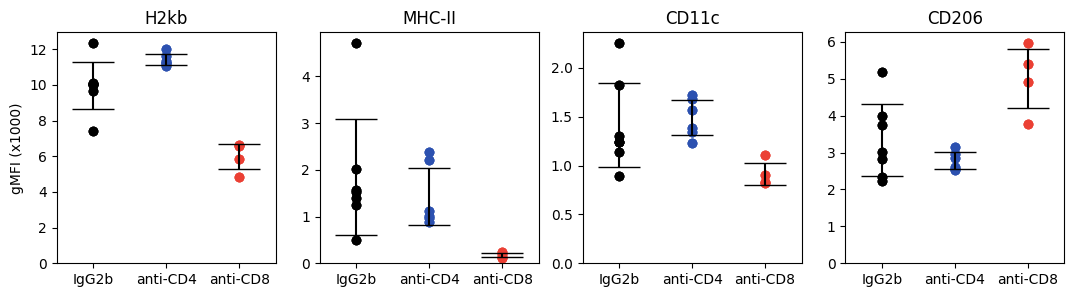

In [61]:
# declare axes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

# plot 1
plot_1(data_1, fig, ax1)
ax1.set_title('H2kb')
ax1.set_ylabel('gMFI (x1000)')
plot_1(data_3, fig, ax2)
ax2.set_title('MHC-II')
plot_1(data_4, fig, ax3)
ax3.set_title('CD11c') 
plot_1(data_2, fig, ax4)
ax4.set_title('CD206') 


In [67]:
# load data
data_1 = pd.read_excel('data/Paper1_figure_5A.xls', sheet_name='Sheet1', skiprows=2)
data_2 = pd.read_excel('data/Paper1_figure_5A.xls', sheet_name='Sheet2', skiprows=2)
data_3 = pd.read_excel('data/Paper1_figure_5A.xls', sheet_name='Sheet3', skiprows=2)
data_4 = pd.read_excel('data/Paper1_figure_5A.xls', sheet_name='Sheet4', skiprows=2)


# print data
data_1

,BMDC,TAM,CD103+ DC,TAM.1,CD103+ DC.1
0,1.123415,2.615807,2.478867,NaN,NaN
1,1.005495,2.518174,NaN,NaN,NaN
2,0.871090,2.589180,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,1.037052,3.999195,4.442207,1.973419,0.916230
5,0.966573,3.761579,NaN,1.612968,NaN
6,0.839710,4.891261,NaN,1.459928,NaN
7,1.107531,4.683850,NaN,1.858639,NaN
8,1.049134,4.498590,NaN,1.733790,NaN
9,NaN,NaN,NaN,NaN,NaN


In [101]:
def plot_2(data, fig, axes, title):
    color = '#eb4034'
    for i in range(3):
        axes.scatter(1*np.ones(len(data['BMDC'])), 
                data['BMDC'], 
                color=color)
        axes.scatter(2*np.ones(len(data['TAM'])), 
                data['TAM'], 
                color=color)
        axes.scatter(3*np.ones(len(data['CD103+ DC'])), 
                data['CD103+ DC'], 
                color=color)
        axes.scatter(4*np.ones(len(data['TAM.1'])), 
                data['TAM.1'], 
                color=color)
        axes.scatter(5*np.ones(len(data['CD103+ DC.1'])), 
                data['CD103+ DC.1'], 
                color=color)

    # the error bars
    axes.bar(1,
            height=np.mean(data['BMDC']),
            yerr=np.std(data['BMDC']),    # error bars
            capsize=10, # error bar cap width in points
            color=(0, 0, 0, 0),  # face color transparent
            edgecolor=(0, 0, 0, 0),
            )

    axes.bar(2,
        height=np.mean(data['TAM']),
        yerr=np.std(data['TAM']),    # error bars
        capsize=10, # error bar cap width in points
        color=(0, 0, 0, 0),  # face color transparent
        edgecolor=(0, 0, 0, 0),
        )      

    axes.bar(3,
            height=np.mean(data['CD103+ DC']),
            yerr=np.std(data['CD103+ DC']),    # error bars
            capsize=7, # error bar cap width in points
            color=(0, 0, 0, 0),  # face color transparent
            edgecolor=(0, 0, 0, 0),
            ) 
    axes.bar(4,
            height=np.mean(data['TAM.1']),
            yerr=np.std(data['TAM.1']),    # error bars
            capsize=7, # error bar cap width in points
            color=(0, 0, 0, 0),  # face color transparent
            edgecolor=(0, 0, 0, 0),
            )      
    axes.bar(5,
            height=np.mean(data['CD103+ DC.1']),
            yerr=np.std(data['CD103+ DC.1']),    # error bars
            capsize=7, # error bar cap width in points
            color=(0, 0, 0, 0),  # face color transparent
            edgecolor=(0, 0, 0, 0),
            )      


    # more parameters
    # axes.set_xlim([0.5, 5])
    axes.set_xticks([1, 2, 3, 4, 5], ['BMDC', 'TAM', 'CD103+ DC', 'TAM.1', 'CD103+ DC.1'])
    axes.tick_params(axis='x', labelrotation=55)  
    axes.set_title(title)
    fig.set_size_inches([13, 3])

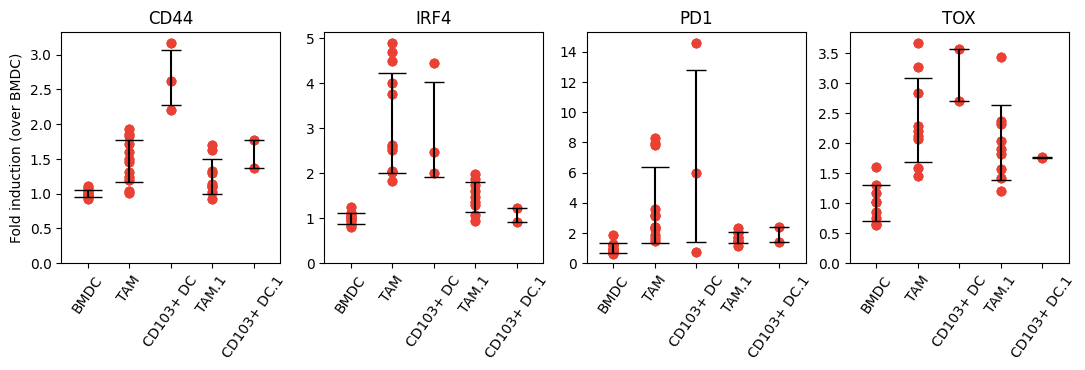

In [102]:
# declare axes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

# plot 2
plot_2(data_1, fig, ax2, 'IRF4')
ax1.set_ylabel('Fold induction (over BMDC)')
plot_2(data_2, fig, ax3, 'PD1')
plot_2(data_3, fig, ax1, 'CD44')
plot_2(data_4, fig, ax4, 'TOX')


In [182]:
# load data
data = pd.read_excel('data/Paper1_figure_5C.xls', skiprows=2, index_col=0).T
o2_21 = data[:4]
o2_15 = data[4:]
# print data
o2_15.describe()


,BMDC,BMDC+SL8,TAM,2x TAM,TAM,2x TAM
count,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
mean,1.537500,35.575000,2.720000,7.256667,0.202500,0.855000
std,2.588801,1.152895,1.055683,2.903900,0.028723,0.892394
min,0.180000,33.900000,1.820000,4.030000,0.170000,0.240000
25%,0.232500,35.325000,1.850000,6.055000,0.192500,0.255000
50%,0.275000,35.950000,2.555000,8.080000,0.200000,0.520000
75%,1.580000,36.200000,3.425000,8.870000,0.210000,1.120000
max,5.420000,36.500000,3.950000,9.660000,0.240000,2.140000


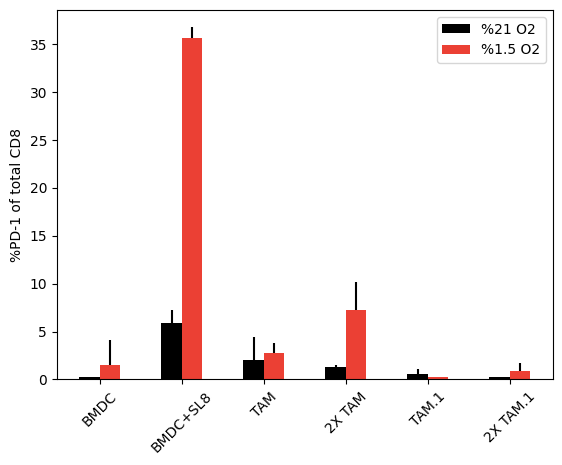

In [193]:
# declare figure and axes
fig, ax = plt.subplots()
x_locs = np.arange(0, 12, 2)
# ax.set_yscale("log", nonpositive='clip')

# 21% O2 plot
ax.bar(
    x_locs-0.25,
    o2_21.mean(),
    yerr=[np.zeros(6), o2_21.std()],
    # error_kw={zorder:0}
    width=0.5,
    color='#000000',
    label='%21 O2'
)

# 1.5% O2 plot
ax.bar(
    x_locs+0.25,
    o2_15.mean(),
    yerr=[np.zeros(6), o2_15.std()],
    width=0.5,
    color='#eb4034',
    label='%1.5 O2'
)

# more params
ax.set_xticks(x_locs, ['BMDC', 'BMDC+SL8', 'TAM', '2X TAM', 'TAM.1', '2X TAM.1'])
ax.set_ylabel('%PD-1 of total CD8')
ax.legend()
ax.tick_params(axis='x', labelrotation=45)  

# fig.set_size_inches([13, 3])